## Get the data

the data is stored in google drive, we can download it using the following link https://drive.google.com/file/d/1is8swb_EAh0BSRtEFZ_m43CIqFlFMatX/view?usp=sharing

In [ ]:
# extracting the data

import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/ml_projects/corona_radiography_dataset/archive.zip")
zip_ref.extractall()
zip_ref.close()

## Inspecting the data

In [ ]:
import os

# Walk through COVID-19_Radiography_Dataset directory and list number of files
for dirpath, dirnames, filenames in os.walk("COVID-19_Radiography_Dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'.")

There are 4 directories and 5 files in 'COVID-19_Radiography_Dataset'.
There are 2 directories and 0 files in 'COVID-19_Radiography_Dataset/COVID'.
There are 0 directories and 3616 files in 'COVID-19_Radiography_Dataset/COVID/masks'.
There are 0 directories and 3616 files in 'COVID-19_Radiography_Dataset/COVID/images'.
There are 2 directories and 0 files in 'COVID-19_Radiography_Dataset/Lung_Opacity'.
There are 0 directories and 6012 files in 'COVID-19_Radiography_Dataset/Lung_Opacity/masks'.
There are 0 directories and 6012 files in 'COVID-19_Radiography_Dataset/Lung_Opacity/images'.
There are 2 directories and 0 files in 'COVID-19_Radiography_Dataset/Normal'.
There are 0 directories and 10192 files in 'COVID-19_Radiography_Dataset/Normal/masks'.
There are 0 directories and 10192 files in 'COVID-19_Radiography_Dataset/Normal/images'.
There are 2 directories and 0 files in 'COVID-19_Radiography_Dataset/Viral Pneumonia'.
There are 0 directories and 1345 files in 'COVID-19_Radiography_Da

In [ ]:
import pandas as pd

In [ ]:
covid_path = "/content/COVID-19_Radiography_Dataset/COVID/images"
normal_path = "/content/COVID-19_Radiography_Dataset/Normal/images"
pneumonia_path = "/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images"

#data_dir = os.path.join(path)

data = []
for file in os.listdir(os.path.join(covid_path)):
  data.append([file, 'Covid'])

for file in os.listdir(os.path.join(normal_path)):
  data.append([file, 'Normal'])

for file in os.listdir(os.path.join(pneumonia_path)):
  data.append([file, 'Pneumonia'])

data = pd.DataFrame(data, columns = ['image_file', 'class_name'])

#data['path'] = path + '/' + data['image_file']
#data['class_name'] = data['class_name'].map({'Normal/images' : 'Normal', 'COVID/images' : 'COVID', 'Viral Pneumonia/images' : 'Pneumonia'})

data.head()

,image_file,class_name
0,COVID-1028.png,Covid
1,COVID-2639.png,Covid
2,COVID-551.png,Covid
3,COVID-2722.png,Covid
4,COVID-1986.png,Covid


In [ ]:
# Total images
len(data)

15153

### Visualizing images

In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img, cmap="gray")
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['COVID-1661.png']
Image shape: (299, 299)


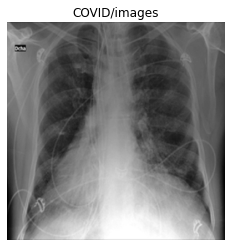

In [ ]:
img = view_random_image(target_dir="/content/COVID-19_Radiography_Dataset/",
                        target_class="COVID/images")

['Normal-8910.png']
Image shape: (299, 299)
['COVID-2606.png']
Image shape: (299, 299)
['Viral Pneumonia-809.png']
Image shape: (299, 299)


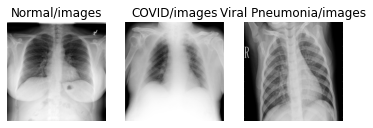

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 3, 1)
normal_image = view_random_image("/content/COVID-19_Radiography_Dataset/", "Normal/images")
plt.subplot(1, 3, 2)
covid_image = view_random_image("/content/COVID-19_Radiography_Dataset/", "COVID/images")
plt.subplot(1, 3, 3)
pneumonia_image = view_random_image("/content/COVID-19_Radiography_Dataset/", "Viral Pneumonia/images")

In [ ]:
data['class_name'].value_counts()

Normal       10192
Covid         3616
Pneumonia     1345
Name: class_name, dtype: int64

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,image_file,class_name
5884,Normal-1397.png,Normal
10728,Normal-2952.png,Normal
7436,Normal-1417.png,Normal
5633,Normal-4822.png,Normal
9894,Normal-5003.png,Normal


## Creating directories



In [ ]:
data_dir = 'data_dir'
os.mkdir(data_dir)

covid_dir = os.path.join(data_dir, 'covid')
os.mkdir(covid_dir)

normal_dir = os.path.join(data_dir, 'normal')
os.mkdir(normal_dir)

viral_dir = os.path.join(data_dir, 'viral pneumonia')
os.mkdir(viral_dir)

### Transfer images into folders we just create

In [ ]:
import shutil

In [ ]:
for ind in data.index:
    
    
    if data["class_name"][ind] == 'Covid':
        label = 'covid'
        src = os.path.join('/content/COVID-19_Radiography_Dataset/COVID/images', data["image_file"][ind])
        
    if data["class_name"][ind] == 'Normal':
        label = 'normal'
        src = os.path.join('/content/COVID-19_Radiography_Dataset/Normal/images', data["image_file"][ind])
        
    if data["class_name"][ind] == 'Pneumonia':
        label = 'viral pneumonia'
        src = os.path.join('/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images', data["image_file"][ind])
  
    # destination path to image
    dst = os.path.join(data_dir, label, data["image_file"][ind])
    
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [ ]:
# check the number of train images in each folder
print(len(os.listdir('data_dir/covid')))
print(len(os.listdir('data_dir/normal')))
print(len(os.listdir('data_dir/viral pneumonia')))

3616
10192
1345


File preparation is done now...

In [ ]:
data.head()

,image_file,class_name
5884,Normal-1397.png,Normal
10728,Normal-2952.png,Normal
7436,Normal-1417.png,Normal
5633,Normal-4822.png,Normal
9894,Normal-5003.png,Normal


In [ ]:
data['path'] = " "
for index, row in data.iterrows():
  if(row['class_name']=='Normal'):
    row['path'] = '/content/data_dir/normal/' + row['image_file']
  if(row['class_name']=='Covid'):
    row['path'] = '/content/data_dir/covid/' + row['image_file']
  if(row['class_name']=='Pneumonia'):
    row['path'] = '/content/data_dir/viral pneumonia/' + row['image_file']

data.head()

,image_file,class_name,path
5884,Normal-1397.png,Normal,/content/data_dir/normal/Normal-1397.png
10728,Normal-2952.png,Normal,/content/data_dir/normal/Normal-2952.png
7436,Normal-1417.png,Normal,/content/data_dir/normal/Normal-1417.png
5633,Normal-4822.png,Normal,/content/data_dir/normal/Normal-4822.png
9894,Normal-5003.png,Normal,/content/data_dir/normal/Normal-5003.png


In [ ]:
import cv2

In [ ]:
X = []
y = []

for i in range(len(data)):
    image = cv2.imread(data['path'][i])
    image = cv2.resize(image, (90, 90)) / 255.0
    label=0
    if(data['class_name'][i]=='Normal'):
      label=0
    if(data['class_name'][i]=='Covid'):
      label=1
    if(data['class_name'][i]=='Pneumonia'):
      label=2

    X.append(image)
    y.append(label)

## Train-test split

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)

print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(10909, 90, 90, 3) (3031, 90, 90, 3) (1213, 90, 90, 3) (10909,) (3031,) (1213,)


In [ ]:
X = []
y = []

In [ ]:
# Creating tensorboard callbacks
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Building models

## Model 1: Cnn model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = layers.Input(shape=(90, 90, 3))
x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)


x = layers.Flatten()(x)

x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)

outputs = layers.Dense(3, activation='softmax')(x)

model_1 = tf.keras.Model(inputs, outputs, name="model_1_cnn")

In [ ]:
model_1.summary()

Model: "model_1_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 90, 90, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 90, 90, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 45, 45, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        

In [ ]:
model_1.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)

In [ ]:
history_1 = model_1.fit(X_train,y_train,
                        epochs=20,
                        validation_data=(X_val, y_val),
                        callbacks=[create_tensorboard_callback("training_logs", "model_1_cnn"),
                                   early_stopping])

Saving TensorBoard log files to: training_logs/model_1_cnn/20220609-124806
Epoch 1/20
341/341 [==============================] - 16s 12ms/step - loss: 0.5200 - accuracy: 0.7762 - val_loss: 0.2709 - val_accuracy: 0.8945
Epoch 2/20
341/341 [==============================] - 3s 10ms/step - loss: 0.2577 - accuracy: 0.8957 - val_loss: 0.2021 - val_accuracy: 0.9217
Epoch 3/20
341/341 [==============================] - 4s 11ms/step - loss: 0.1960 - accuracy: 0.9228 - val_loss: 0.2297 - val_accuracy: 0.9159
Epoch 4/20
341/341 [==============================] - 3s 10ms/step - loss: 0.1517 - accuracy: 0.9439 - val_loss: 0.1617 - val_accuracy: 0.9398
Epoch 5/20
341/341 [==============================] - 3s 10ms/step - loss: 0.1253 - accuracy: 0.9540 - val_loss: 0.1481 - val_accuracy: 0.9489
Epoch 6/20
341/341 [==============================] - 4s 10ms/step - loss: 0.1080 - accuracy: 0.9608 - val_loss: 0.1174 - val_accuracy: 0.9646
Epoch 7/20
341/341 [==============================] - 4s 10ms/step

### Evaluating model-1

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for ?

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

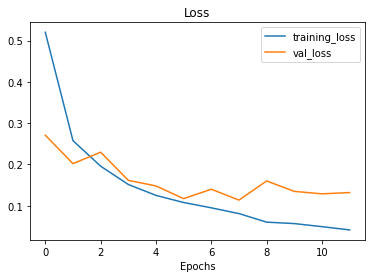

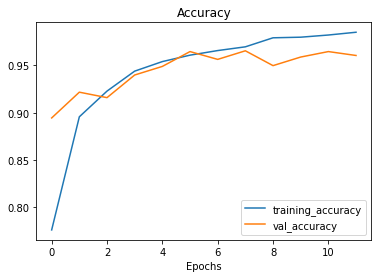

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1.evaluate(X_test, y_test)

95/95 [==============================] - 1s 7ms/step - loss: 0.1381 - accuracy: 0.9528


[0.1381259709596634, 0.9528208374977112]

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted",)
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
y_pred_model_1_cnn = model_1.predict(X_test)

In [ ]:
y_pred_model_1_cnn = np.argmax(y_pred_model_1_cnn, axis=1)

In [ ]:
model_1_cnn_test_results = calculate_results(y_test, y_pred_model_1_cnn)
model_1_cnn_test_results

{'accuracy': 95.2820851204223,
 'f1': 0.9525484322163561,
 'precision': 0.9526520565544637,
 'recall': 0.952820851204223}

In [ ]:
count_0 = (y_test==0).sum()
count_1 = (y_test==1).sum()
count_2 = (y_test==2).sum()
count_0, count_1, count_2

(2022, 725, 284)

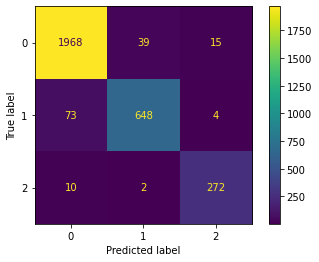

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

matrix_1 = confusion_matrix(y_true=y_test, y_pred=y_pred_model_1_cnn)

p1 = ConfusionMatrixDisplay(matrix_1)
p1.plot();


In [ ]:
model_1.save('/content/drive/MyDrive/model/cnn_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model/cnn_model/assets


In [ ]:
model_1.save('/content/drive/MyDrive/model/cnn_model.h5')

## Model 2: VGG16

In [ ]:
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

In [ ]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):

    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
input_shape = (90, 90, 3)
optim_1 = tf.keras.optimizers.Adam(learning_rate=0.001)
n_classes=3

model_2 = create_model(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
history_2 = model_2.fit(X_train,y_train,
                        epochs=20,
                        validation_data=(X_val, y_val),
                        callbacks=[create_tensorboard_callback("training_logs", "model_2_vgg16"),
                                   early_stopping])

Saving TensorBoard log files to: training_logs/model_2_vgg16/20220326-150806
Epoch 1/20
341/341 [==============================] - 29s 83ms/step - loss: 0.3890 - accuracy: 0.8509 - val_loss: 0.2260 - val_accuracy: 0.9093
Epoch 2/20
341/341 [==============================] - 28s 82ms/step - loss: 0.2295 - accuracy: 0.9103 - val_loss: 0.3101 - val_accuracy: 0.8813
Epoch 3/20
341/341 [==============================] - 28s 81ms/step - loss: 0.1888 - accuracy: 0.9279 - val_loss: 0.1679 - val_accuracy: 0.9415
Epoch 4/20
341/341 [==============================] - 28s 81ms/step - loss: 0.1625 - accuracy: 0.9338 - val_loss: 0.1793 - val_accuracy: 0.9316
Epoch 5/20
341/341 [==============================] - 28s 81ms/step - loss: 0.1522 - accuracy: 0.9385 - val_loss: 0.1883 - val_accuracy: 0.9365
Epoch 6/20
341/341 [==============================] - 28s 81ms/step - loss: 0.1287 - accuracy: 0.9501 - val_loss: 0.1810 - val_accuracy: 0.9415
Epoch 7/20
341/341 [==============================] - 28s 8

### Evaluating model-2

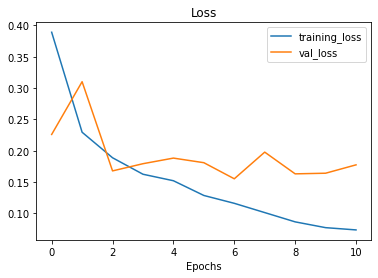

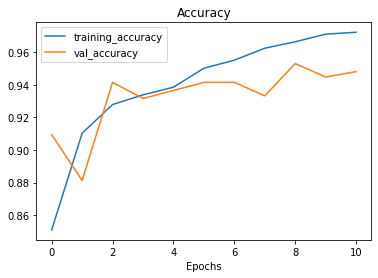

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_2.evaluate(X_test, y_test)

95/95 [==============================] - 7s 71ms/step - loss: 0.2073 - accuracy: 0.9330


[0.20727744698524475, 0.9330254197120667]

In [ ]:
y_pred_model_2_vgg_16 = model_2.predict(X_test)
y_pred_model_2_vgg_16 = np.argmax(y_pred_model_2_vgg_16, axis=1)

In [ ]:
model_2_vgg16_test_results = calculate_results(y_test, y_pred_model_2_vgg_16)
model_2_vgg16_test_results

{'accuracy': 93.30254041570439,
 'f1': 0.9323060318858416,
 'precision': 0.9342035053228764,
 'recall': 0.9330254041570438}

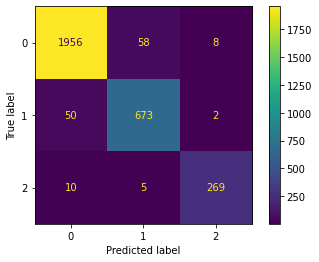

In [ ]:
matrix_2 = confusion_matrix(y_true=y_test, y_pred=y_pred_model_2_vgg_16)

p1 = ConfusionMatrixDisplay(matrix_1)
p1.plot();

## Model 3: VGG19

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):

    conv_base = VGG19(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
model_3 = create_model(input_shape=(90,90,3),n_classes=3,optimizer=tf.keras.optimizers.Adam())

In [ ]:
history_3 = model_3.fit(X_train,y_train,
                        epochs=20,
                        validation_data=(X_val, y_val),
                        callbacks=[create_tensorboard_callback("training_logs", "model_3_vgg19"),
                                   early_stopping])

Saving TensorBoard log files to: training_logs/model_3_vgg19/20220326-142140
Epoch 1/20
341/341 [==============================] - 37s 107ms/step - loss: 0.4653 - accuracy: 0.8183 - val_loss: 0.2801 - val_accuracy: 0.8978
Epoch 2/20
341/341 [==============================] - 35s 103ms/step - loss: 0.2861 - accuracy: 0.8849 - val_loss: 0.2929 - val_accuracy: 0.8879
Epoch 3/20
341/341 [==============================] - 35s 102ms/step - loss: 0.2362 - accuracy: 0.9067 - val_loss: 0.2060 - val_accuracy: 0.9217
Epoch 4/20
341/341 [==============================] - 33s 95ms/step - loss: 0.2100 - accuracy: 0.9180 - val_loss: 0.2097 - val_accuracy: 0.9250
Epoch 5/20
341/341 [==============================] - 33s 96ms/step - loss: 0.1997 - accuracy: 0.9213 - val_loss: 0.2251 - val_accuracy: 0.9085
Epoch 6/20
341/341 [==============================] - 35s 102ms/step - loss: 0.1788 - accuracy: 0.9310 - val_loss: 0.1845 - val_accuracy: 0.9275
Epoch 7/20
341/341 [==============================] - 3

### Evaluating model-3

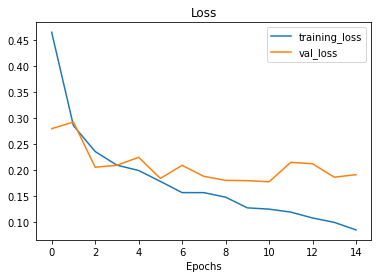

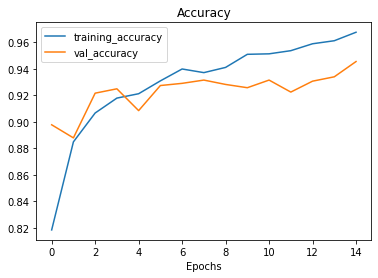

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_3.evaluate(X_test, y_test)

95/95 [==============================] - 9s 98ms/step - loss: 0.2136 - accuracy: 0.9353


[0.21355924010276794, 0.9353348612785339]

In [ ]:
y_pred_model_3_vgg_19 = model_3.predict(X_test)
y_pred_model_3_vgg_19 = np.argmax(y_pred_model_3_vgg_19, axis=1)

In [ ]:
model_3_vgg19_test_results = calculate_results(y_test, y_pred_model_3_vgg_19)
model_3_vgg19_test_results

{'accuracy': 93.53348729792148,
 'f1': 0.9353175650463231,
 'precision': 0.935964403652474,
 'recall': 0.9353348729792148}

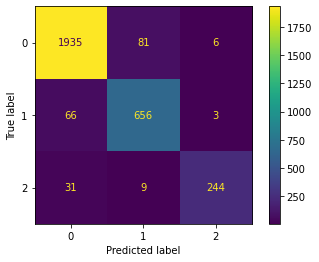

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

matrix_3 = confusion_matrix(y_true=y_test, y_pred=y_pred_model_3_vgg_19)

p1 = ConfusionMatrixDisplay(matrix_3)
p1.plot();

## Model 4: Inception v3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):

    conv_base = InceptionV3(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
model_4 = create_model(input_shape=(90,90,3),n_classes=3,optimizer=tf.keras.optimizers.Adam())

87924736/87910968 [==============================] - 2s 0us/step


In [ ]:
history_4 = model_4.fit(X_train,y_train,
                        epochs=20,
                        validation_data=(X_val, y_val),
                        callbacks=[create_tensorboard_callback("training_logs", "model_4_inception_v3"),
                                   early_stopping])

Saving TensorBoard log files to: training_logs/model_4_inception_v3/20220326-144505
Epoch 1/20
341/341 [==============================] - 30s 68ms/step - loss: 0.5520 - accuracy: 0.7995 - val_loss: 0.4487 - val_accuracy: 0.8071
Epoch 2/20
341/341 [==============================] - 21s 60ms/step - loss: 0.3460 - accuracy: 0.8572 - val_loss: 0.4428 - val_accuracy: 0.8203
Epoch 3/20
341/341 [==============================] - 21s 63ms/step - loss: 0.2903 - accuracy: 0.8807 - val_loss: 0.4482 - val_accuracy: 0.8326
Epoch 4/20
341/341 [==============================] - 22s 64ms/step - loss: 0.2406 - accuracy: 0.9040 - val_loss: 0.5280 - val_accuracy: 0.8302
Epoch 5/20
341/341 [==============================] - 21s 61ms/step - loss: 0.2033 - accuracy: 0.9188 - val_loss: 0.5763 - val_accuracy: 0.8203
Epoch 6/20
341/341 [==============================] - 21s 60ms/step - loss: 0.1605 - accuracy: 0.9368 - val_loss: 0.5380 - val_accuracy: 0.8392
Epoch 6: early stopping


### Evaluating model-4

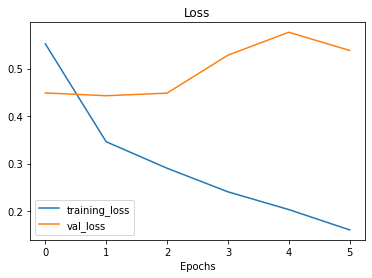

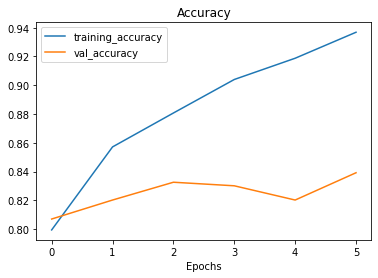

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_4.evaluate(X_test, y_test)

95/95 [==============================] - 7s 73ms/step - loss: 0.4532 - accuracy: 0.8598


[0.45320945978164673, 0.8597822785377502]

In [ ]:
y_pred_model_4_inception_v3 = model_4.predict(X_test)
y_pred_model_4_inception_v3 = np.argmax(y_pred_model_4_inception_v3, axis=1)

In [ ]:
model_4_inception_v3_test_results = calculate_results(y_test, y_pred_model_4_inception_v3)
model_4_inception_v3_test_results

{'accuracy': 85.9782250082481,
 'f1': 0.8574739442159776,
 'precision': 0.8570277924379307,
 'recall': 0.859782250082481}

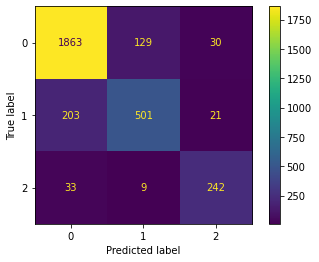

In [ ]:
matrix_4 = confusion_matrix(y_true=y_test, y_pred=y_pred_model_4_inception_v3)

p1 = ConfusionMatrixDisplay(matrix_4)
p1.plot();

## Comparing every model results

In [ ]:
all_results = {
    'model_1_cnn' : model_1_cnn_test_results,
    'model_2_vgg16' : model_2_vgg16_test_results,
    'model_3_vgg_19' : model_3_vgg19_test_results,
    'model_4_inception_v3' : model_4_inception_v3_test_results
}

df = pd.DataFrame(all_results)

df = df.transpose()

df

,accuracy,precision,recall,f1
model_1_cnn,95.612009,0.956313,0.956120,0.956195
model_2_vgg16,93.302540,0.934204,0.933025,0.932306
model_3_vgg_19,93.533487,0.935964,0.935335,0.935318
model_4_inception_v3,85.978225,0.857028,0.859782,0.857474


## Uploading data on tensorboard

In [ ]:
!tensorboard dev upload --logdir ./training_logs/ \
  --name "Covid-19_Radiography_Dataset" \
  --description "We will be comparing results from four models 1) cnn 2) vgg16 3) vgg19 4) inception-v3" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/q6y2NasGTjKDjLmwOGdJiQ/

[2022-03-26T15:26:15] Started scanning logdir.
[2022-03-26T15:26:21] Total uploaded: 516 scalars, 0 tensors, 7 binary objects (966.9 kB)
[2022-03-26T15:26:21] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/q6y2NasGTjKDjLmwOGdJiQ/


In [ ]:
!tensorboard dev list

https://tensorboard.dev/experiment/q6y2NasGTjKDjLmwOGdJiQ/
	Name                 Covid-19_Radiography_Dataset
	Description          We will be comparing results from four models 1) cnn 2) vgg16 3) vgg19 4) inception-v3
	Id                   q6y2NasGTjKDjLmwOGdJiQ
	Created              2022-03-26 15:26:15 (24 seconds ago)
	Updated              2022-03-26 15:26:21 (18 seconds ago)
	Runs                 14
	Tags                 5
	Scalars              516
	Tensor bytes         0
	Binary object bytes  991214
https://tensorboard.dev/experiment/nARZUPhgQuqF23pEZq4tmw/
	Name                 First deep model on text data
	Description          Trying a dense model with an embedding layer
	Id                   nARZUPhgQuqF23pEZq4tmw
	Created              2022-02-17 12:27:48
	Updated              2022-02-17 12:27:49
	Runs                 2
	Tags                 5
	Scalars              30
	Tensor bytes         0
	Binary object bytes  64743
https://tensorboard.dev/experiment/S4fwByH5SKSmPwIZl2frwQ/